In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-03-03 17:31:04--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.200.48, 216.58.200.240, 172.217.24.16, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.200.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  7.75MB/s    in 11s     

2021-03-03 17:31:16 (5.84 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile 
import tensorflow as tf 
from tensorflow.keras.optimizers import RMSprop 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 


/home/dske/anaconda3/envs/gluon/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dske/anaconda3/envs/gluon/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dske/anaconda3/envs/gluon/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/dske/anaconda3/envs/gluon/lib/python3.6/site-pack

In [3]:
local_zip='/tmp/cats_and_dogs_filtered.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp') 
zip_ref.close() 

base_dir='/tmp/cats_and_dogs_filtered'
train_dir=os.path.join(base_dir,'train') 
validation_dir=os.path.join(base_dir,'validation') 

train_cats_dir=os.path.join(train_dir,'cats') 

train_dogs_dir=os.path.join(train_dir,'dogs') 

validation_cats_dir=os.path.join(validation_dir,'cats') 

validation_dogs_dir=os.path.join(validation_dir,'dogs') 

model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu')  ,
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu') ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(125,(3,3),activation='relu') ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid') ,
])

model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=1e-4),
             metrics=['acc']) 


train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')  

validation_generator=test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')  

history=model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2) 







Instructions for updating:
Colocations handled automatically by placer.
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
50/50 [==============================] - 3s 55ms/step - loss: 0.6718 - acc: 0.6260
 - 9s - loss: 0.6905 - acc: 0.5370 - val_loss: 0.6718 - val_acc: 0.6260
Epoch 2/100
50/50 [==============================] - 3s 56ms/step - loss: 0.6426 - acc: 0.6390
 - 8s - loss: 0.6611 - acc: 0.6080 - val_loss: 0.6426 - val_acc: 0.6390
Epoch 3/100
50/50 [==============================] - 3s 54ms/step - loss: 0.6351 - acc: 0.5950
 - 7s - loss: 0.6140 - acc: 0.6700 - val_loss: 0.6351 - val_acc: 0.5950
Epoch 4/100
50/50 [==============================] - 3s 54ms/step - loss: 0.5955 - acc: 0.6960
 - 7s - loss: 0.5721 - acc: 0.7070 - val_loss: 0.5955 - val_acc: 0.6960
Epoch 5/100
50/50 [==============================] - 3s 56ms/step - loss: 0.5738 - acc: 0.7020
 - 8s - loss: 0.5411 - acc: 0.725

Epoch 46/100
50/50 [==============================] - 3s 53ms/step - loss: 1.4330 - acc: 0.7520: 0s - loss: 1.4763 - acc: 0.7
 - 7s - loss: 0.0110 - acc: 0.9965 - val_loss: 1.4330 - val_acc: 0.7520
Epoch 47/100
50/50 [==============================] - 3s 53ms/step - loss: 1.5287 - acc: 0.7450
 - 7s - loss: 0.0085 - acc: 0.9975 - val_loss: 1.5287 - val_acc: 0.7450
Epoch 48/100
50/50 [==============================] - 3s 56ms/step - loss: 1.5208 - acc: 0.7360
 - 8s - loss: 0.0094 - acc: 0.9965 - val_loss: 1.5208 - val_acc: 0.7360
Epoch 49/100
50/50 [==============================] - 3s 56ms/step - loss: 1.7664 - acc: 0.7320
 - 8s - loss: 0.0037 - acc: 0.9985 - val_loss: 1.7664 - val_acc: 0.7320
Epoch 50/100
50/50 [==============================] - 3s 54ms/step - loss: 1.5741 - acc: 0.7450
 - 8s - loss: 0.0085 - acc: 0.9970 - val_loss: 1.5741 - val_acc: 0.7450
Epoch 51/100
50/50 [==============================] - 3s 55ms/step - loss: 1.5714 - acc: 0.7300
 - 8s - loss: 0.0065 - acc: 0.9980

50/50 [==============================] - 3s 54ms/step - loss: 2.2058 - acc: 0.7300
 - 8s - loss: 1.9628e-04 - acc: 1.0000 - val_loss: 2.2058 - val_acc: 0.7300
Epoch 95/100
50/50 [==============================] - 3s 54ms/step - loss: 2.2205 - acc: 0.7290
 - 7s - loss: 0.0022 - acc: 0.9995 - val_loss: 2.2205 - val_acc: 0.7290
Epoch 96/100
50/50 [==============================] - 3s 54ms/step - loss: 2.3686 - acc: 0.7280
 - 8s - loss: 0.0050 - acc: 0.9975 - val_loss: 2.3686 - val_acc: 0.7280
Epoch 97/100
50/50 [==============================] - 3s 55ms/step - loss: 2.3197 - acc: 0.7200
 - 7s - loss: 0.0011 - acc: 0.9995 - val_loss: 2.3197 - val_acc: 0.7200
Epoch 98/100
50/50 [==============================] - 3s 55ms/step - loss: 2.2190 - acc: 0.7240
 - 8s - loss: 0.0014 - acc: 0.9995 - val_loss: 2.2190 - val_acc: 0.7240
Epoch 99/100
50/50 [==============================] - 3s 54ms/step - loss: 2.3036 - acc: 0.7300
 - 7s - loss: 0.0073 - acc: 0.9975 - val_loss: 2.3036 - val_acc: 0.7300
E

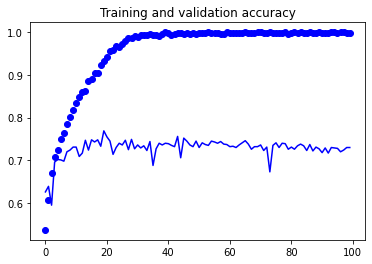

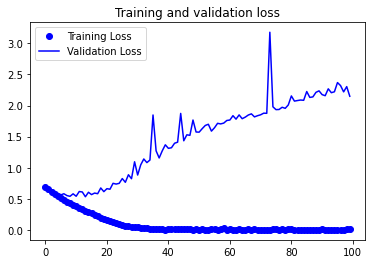

In [5]:
import matplotlib.pyplot as plt 
acc=history.history['acc']
val_acc=history.history['val_acc'] 
loss=history.history['loss'] 

val_loss=history.history['val_loss'] 

epochs=range(len(acc)) 


plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 添加了图像增强之后 

In [6]:
local_zip='/tmp/cats_and_dogs_filtered.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp') 
zip_ref.close() 

base_dir='/tmp/cats_and_dogs_filtered'
train_dir=os.path.join(base_dir,'train') 
validation_dir=os.path.join(base_dir,'validation') 

train_cats_dir=os.path.join(train_dir,'cats') 

train_dogs_dir=os.path.join(train_dir,'dogs') 

validation_cats_dir=os.path.join(validation_dir,'cats') 

validation_dogs_dir=os.path.join(validation_dir,'dogs') 

model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu')  ,
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu') ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(125,(3,3),activation='relu') ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid') ,
])

model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=1e-4),
             metrics=['acc']) 


train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2, # 宽度 
    height_shift_range=0.2, # 高度 
    shear_range=0.2,  # 平行四边形 
    zoom_range=0.2, # 随机缩放范围 
    horizontal_flip=True,
    fill_mode='nearest'  
)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')  

validation_generator=test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')  

history=model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2) 

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
50/50 [==============================] - 3s 56ms/step - loss: 0.6742 - acc: 0.5840
 - 16s - loss: 0.6878 - acc: 0.5365 - val_loss: 0.6742 - val_acc: 0.5840
Epoch 2/100
50/50 [==============================] - 3s 55ms/step - loss: 0.6434 - acc: 0.6400
 - 15s - loss: 0.6742 - acc: 0.5735 - val_loss: 0.6434 - val_acc: 0.6400
Epoch 3/100
50/50 [==============================] - 3s 55ms/step - loss: 0.6126 - acc: 0.6590
 - 15s - loss: 0.6481 - acc: 0.6025 - val_loss: 0.6126 - val_acc: 0.6590
Epoch 4/100
50/50 [==============================] - 3s 55ms/step - loss: 0.6843 - acc: 0.5590
 - 15s - loss: 0.6356 - acc: 0.6345 - val_loss: 0.6843 - val_acc: 0.5590
Epoch 5/100
50/50 [==============================] - 3s 54ms/step - loss: 0.6086 - acc: 0.6360
 - 15s - loss: 0.6115 - acc: 0.6595 - val_loss: 0.6086 - val_acc: 0.6360
Epoch 6/100
50/50 [==============================] - 3s 55ms/step - loss: 0.

Epoch 50/100
50/50 [==============================] - 3s 55ms/step - loss: 0.4407 - acc: 0.7880
 - 15s - loss: 0.4335 - acc: 0.7970 - val_loss: 0.4407 - val_acc: 0.7880
Epoch 51/100
50/50 [==============================] - 3s 55ms/step - loss: 0.4688 - acc: 0.7780
 - 15s - loss: 0.4417 - acc: 0.7820 - val_loss: 0.4688 - val_acc: 0.7780
Epoch 52/100
50/50 [==============================] - 3s 55ms/step - loss: 0.4785 - acc: 0.7720
 - 15s - loss: 0.4279 - acc: 0.8020 - val_loss: 0.4785 - val_acc: 0.7720
Epoch 53/100
50/50 [==============================] - 3s 53ms/step - loss: 0.4366 - acc: 0.7970
 - 15s - loss: 0.4436 - acc: 0.7910 - val_loss: 0.4366 - val_acc: 0.7970
Epoch 54/100
50/50 [==============================] - 3s 56ms/step - loss: 0.4182 - acc: 0.8040
 - 15s - loss: 0.4211 - acc: 0.8075 - val_loss: 0.4182 - val_acc: 0.8040
Epoch 55/100
50/50 [==============================] - 3s 55ms/step - loss: 0.4422 - acc: 0.7710
 - 15s - loss: 0.4192 - acc: 0.8000 - val_loss: 0.4422 - va

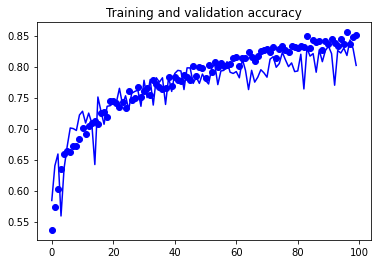

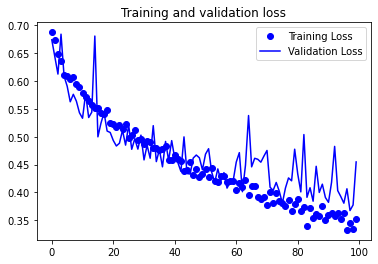

In [7]:
acc=history.history['acc']
val_acc=history.history['val_acc'] 
loss=history.history['loss'] 

val_loss=history.history['val_loss'] 

epochs=range(len(acc)) 


plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()